In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(42)

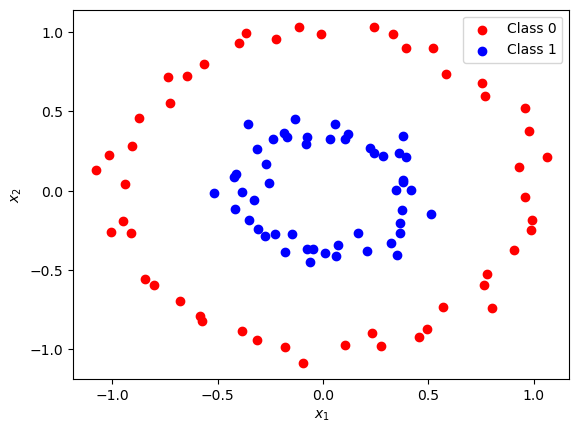

In [2]:
from sklearn.datasets import make_circles

# Generate a synthetic dataset
X, y = make_circles(n_samples=100, factor=0.4, noise=0.05, random_state=42)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.savefig('figures/circles_dataset.pdf', bbox_inches='tight')

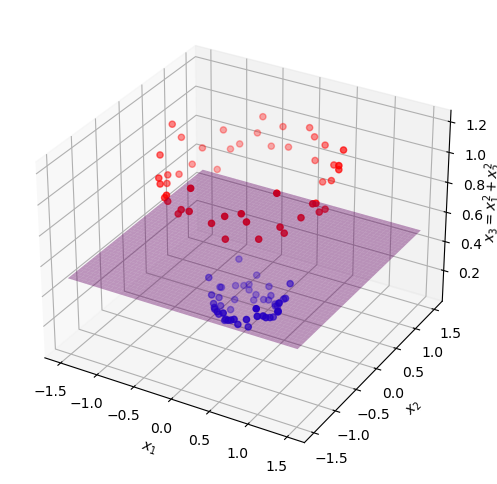

In [42]:
# Define the transformation to 3D (kernel transformation)
def transform_to_3d(X):
    x1 = X[:, 0]
    x2 = X[:, 1]
    x3 = x1**2 + x2**2
    return np.c_[x1, x2, x3]

# Apply the transformation
X_3d = transform_to_3d(X)

# 3D Plot
fig = plt.figure(figsize=(12, 6))
ax3d = fig.add_subplot(111, projection='3d')
ax3d.scatter(X_3d[y == 0, 0], X_3d[y == 0, 1], X_3d[y == 0, 2], color='red', label='Class 0')
ax3d.scatter(X_3d[y == 1, 0], X_3d[y == 1, 1], X_3d[y == 1, 2], color='blue', label='Class 1')
ax3d.set_xlabel('$x_1$')
ax3d.set_ylabel('$x_2$')
ax3d.set_zlabel('$x_3 = x_1^2 + x_2^2$')
ax3d.zaxis.labelpad = -0.7

# Adding a plane to demonstrate separability in 3D
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 50), np.linspace(-1.5, 1.5, 50))
z_value = 0.5
zz = z_value * np.ones_like(xx)
ax3d.plot_surface(xx, yy, zz, alpha=0.4, color='purple')

plt.savefig('figures/circles_3d_transformation.pdf', bbox_inches='tight')

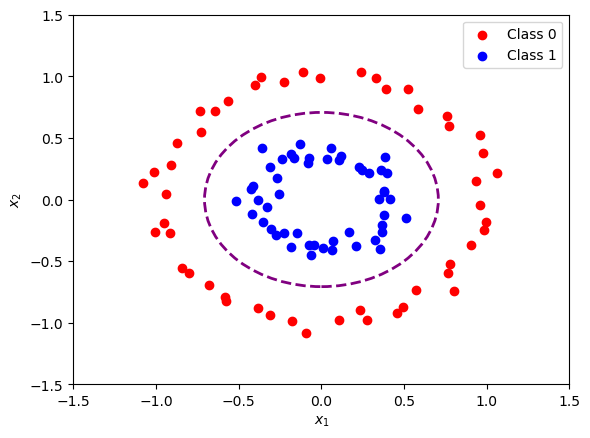

In [44]:
# 2D Plot with decision boundary
fig = plt.figure()
ax2d_decision = fig.add_subplot(111)
ax2d_decision.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Class 0')
ax2d_decision.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1')
radius = np.sqrt(z_value)
circle = plt.Circle((0, 0), radius, color='purple', fill=False, linestyle='--', linewidth=2)
ax2d_decision.add_artist(circle)
ax2d_decision.set_xlim(-1.5, 1.5)
ax2d_decision.set_ylim(-1.5, 1.5)
ax2d_decision.set_xlabel('$x_1$')
ax2d_decision.set_ylabel('$x_2$')
ax2d_decision.legend()

plt.savefig('figures/circles_2d_with_boundary.pdf', bbox_inches='tight')